<a href="https://colab.research.google.com/github/suckgitariuses/Machine_Learning/blob/main/Kuis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adinda Mirza Devani**

**TI-3B/04**

**2341720046**

**KUIS 2 - KLASIFIKASI DENGAN METODE SUPERVISED LEARNING**

**Import Dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content

In [18]:
# IMPORT ULANG LIBRARY SKLEARN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# import dataset
df = pd.read_excel("/content/drive/MyDrive/Dataset_RGB_Warna_Daun_label/Dataset_RGB_Warna_Daun_label.xlsx", skiprows=2)
df.head()

# cek info dataset
df.info()
df.describe()

# merapikan header
df.columns = df.iloc[0]
df = df[1:]

# ubah tipe
df["R"] = df["R"].astype(float)
df["G"] = df["G"].astype(float)
df["B"] = df["B"].astype(float)

df.rename(columns={"No": "Label"}, inplace=True)

print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Label A     275 non-null    object
 1   Unnamed: 1  273 non-null    object
 2   Unnamed: 2  274 non-null    object
 3   Unnamed: 3  274 non-null    object
dtypes: object(4)
memory usage: 8.7+ KB
0 Label      R      G       B
1     1  151.0  149.0  106.40
2     2  151.0  149.0  109.78
3     3  151.0  149.0  106.40
4     4  151.0  149.0  130.06
5     5  151.0  151.4  106.40


**Menangani Missing Value**

In [19]:
print("/nMissing values:")
print(df.isnull().sum())

df = df.fillna(df.mean(numeric_only=True))

/nMissing values:
0
Label    0
R        2
G        1
B        1
dtype: int64


**Normalisasi / Standarisasi**

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[["R", "G", "B"]])

df["R_std"] = scaled_features[:, 0]
df["G_std"] = scaled_features[:, 1]
df["B_std"] = scaled_features[:, 2]

**Feature Engineering**

In [21]:
df["ExG"] = 2*df["G"] - df["R"] - df["B"]
df["Greenness"] = (df["G"] - df["R"]) / (df["R"] + df["G"] + df["B"])

print(df.head())

0 Label      R      G       B     R_std     G_std     B_std    ExG  Greenness
1     1  151.0  149.0  106.40  1.138968  0.332758 -0.364747  40.60  -0.004921
2     2  151.0  149.0  109.78  1.138968  0.332758 -0.118585  37.22  -0.004881
3     3  151.0  149.0  106.40  1.138968  0.332758 -0.364747  40.60  -0.004921
4     4  151.0  149.0  130.06  1.138968  0.332758  1.358382  16.94  -0.004651
5     5  151.0  151.4  106.40  1.138968  0.851861 -0.364747  45.40   0.000978


**Regresi (Linear, Multiple, Polinomial)**

In [22]:
X = df[["R", "G", "B"]]
y = df["Label"].astype(int)

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X[["R"]], y)

print("\nKoefisien Regresi Linear:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

# Multiple Linear Regression
multi_reg = LinearRegression()
multi_reg.fit(X, y)
print("\nKoefisien Multiple Linear Regression:", multi_reg.coef_)

# Polynomial Regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y)

print("\nPolynomial Regression selesai.")


Koefisien Regresi Linear: [-10.36062572]
Intercept: 1637.8100218355635

Koefisien Multiple Linear Regression: [-8.77347798 -2.62885048 -0.24026577]

Polynomial Regression selesai.


**Klasifikasi Naive Bayes + SVM RBF + SVM SIGMOID**

**Saya absen 4**

In [23]:
X = df[["R_std", "G_std", "B_std", "ExG", "Greenness"]]
y = df["Label"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# --- NAIVE BAYES ---
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

# --- SVM RBF ---
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
pred_rbf = svm_rbf.predict(X_test)

# --- SVM SIGMOID ---
svm_sig = SVC(kernel='sigmoid')
svm_sig.fit(X_train, y_train)
pred_sig = svm_sig.predict(X_test)

**Evaluasi**

In [24]:
def eval_model(pred, y_test, title):
    print("\n==============", title, "==============")
    print("Accuracy:", accuracy_score(y_test, pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, pred))
    print("\nClassification Report:\n", classification_report(y_test, pred))

# Eval semua model
eval_model(pred_nb, y_test, "Naive Bayes")
eval_model(pred_rbf, y_test, "SVM RBF")
eval_model(pred_sig, y_test, "SVM Sigmoid")


============== Naive Bayes ==============
Accuracy: 0.0

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]

Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       0.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       0.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          12       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       1.0
          17       0.00      0.00      0.00       1.0
          20       0.00      0.00      0.00       1.0
          23       0.00      0.00      0.00       1.0
          25       0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

**Visualisasi Confusion Matrix**

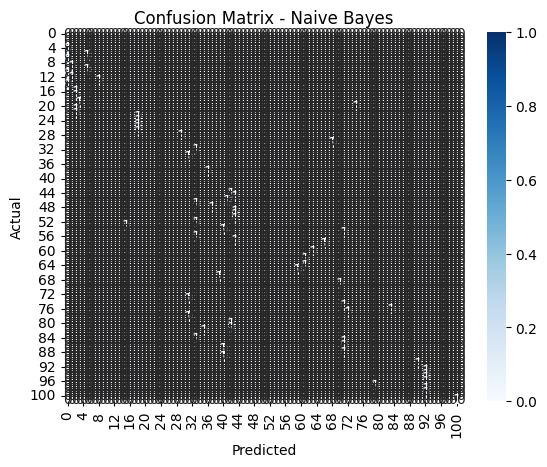

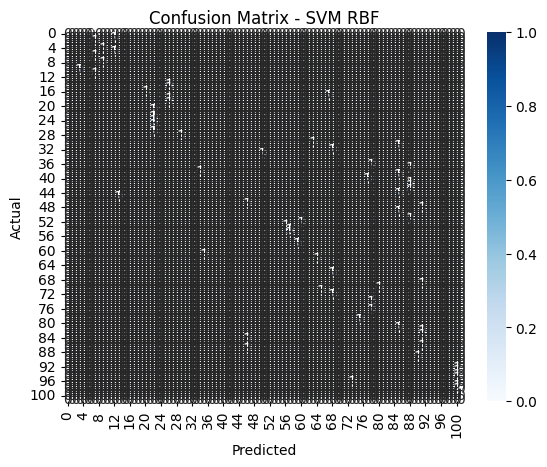

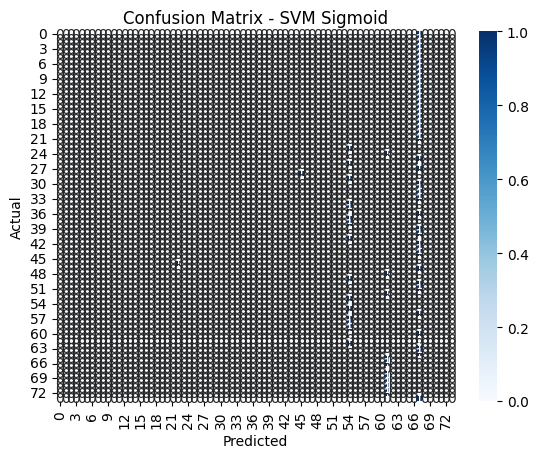

In [25]:
def plot_cm(pred, y_test, title):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_cm(pred_nb, y_test, "Confusion Matrix - Naive Bayes")
plot_cm(pred_rbf, y_test, "Confusion Matrix - SVM RBF")
plot_cm(pred_sig, y_test, "Confusion Matrix - SVM Sigmoid")